** Load and Inspect the Dataset**

In [1]:
# Install necessary libraries (if not already installed)
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}

In [2]:
data <- read.csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Display the first few rows of the dataset
head(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


** Data Cleaning and Exploration **

In [ ]:
# Check for missing values
summary(data)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

In [ ]:
# Check data types
str(data)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

In [3]:
# Replace NA values in TotalCharges with 0 as this is for those customers who has 0 tenure
data$TotalCharges[is.na(data$TotalCharges)] <- 0


In [4]:
# Convert SeniorCitizen to numeric
data$SeniorCitizen <- as.numeric(data$SeniorCitizen)

# Convert tenure, MonthlyCharges, TotalCharges  to numeric
data$tenure <- as.numeric(data$tenure)

In [5]:
data$MonthlyCharges <- as.numeric(data$MonthlyCharges)
data$TotalCharges <- as.numeric(data$TotalCharges)

In [ ]:
# Explore the distribution of numeric variables
summary(data[, c("tenure", "MonthlyCharges", "TotalCharges")])

     tenure      MonthlyCharges    TotalCharges   
 Min.   : 0.00   Min.   : 18.25   Min.   :   0.0  
 1st Qu.: 9.00   1st Qu.: 35.50   1st Qu.: 398.6  
 Median :29.00   Median : 70.35   Median :1394.5  
 Mean   :32.37   Mean   : 64.76   Mean   :2279.7  
 3rd Qu.:55.00   3rd Qu.: 89.85   3rd Qu.:3786.6  
 Max.   :72.00   Max.   :118.75   Max.   :8684.8  

** Visualizing ouliers if any **

In [ ]:
# Install and load necessary libraries
install.packages("ggplot2")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




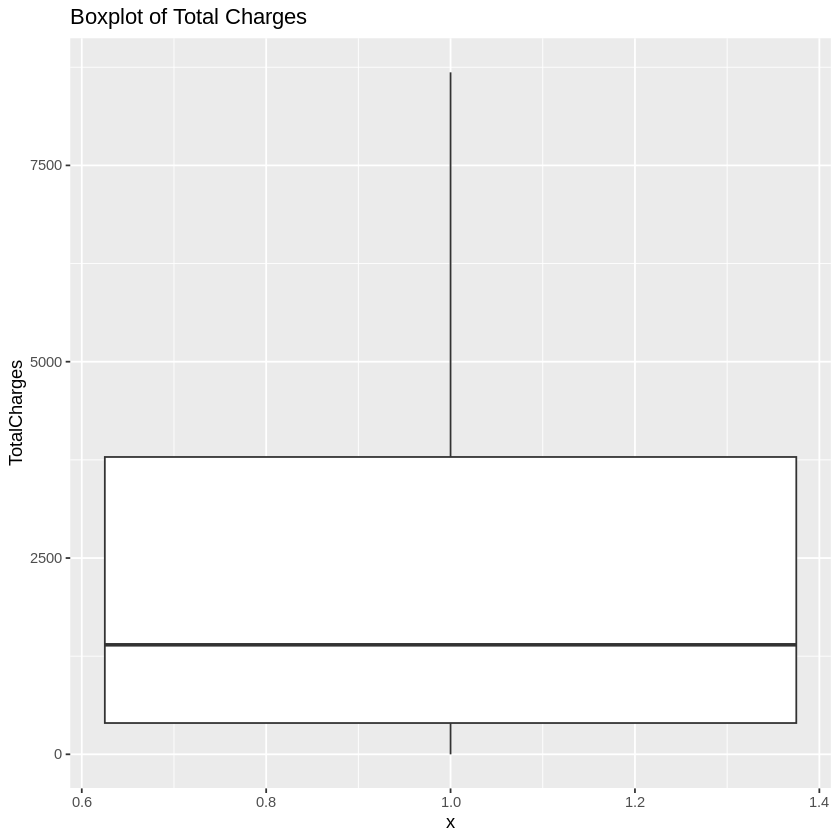

In [ ]:
# Load the required libraries
library(ggplot2)
library(reshape2)

# Create a boxplot for numeric variables
numeric_vars <- data[, c("tenure", "MonthlyCharges", "TotalCharges")]

# Create a boxplot for TotalCharges
ggplot(data, aes(x = 1, y = TotalCharges)) +
  geom_boxplot() +
  labs(title = "Boxplot of Total Charges")


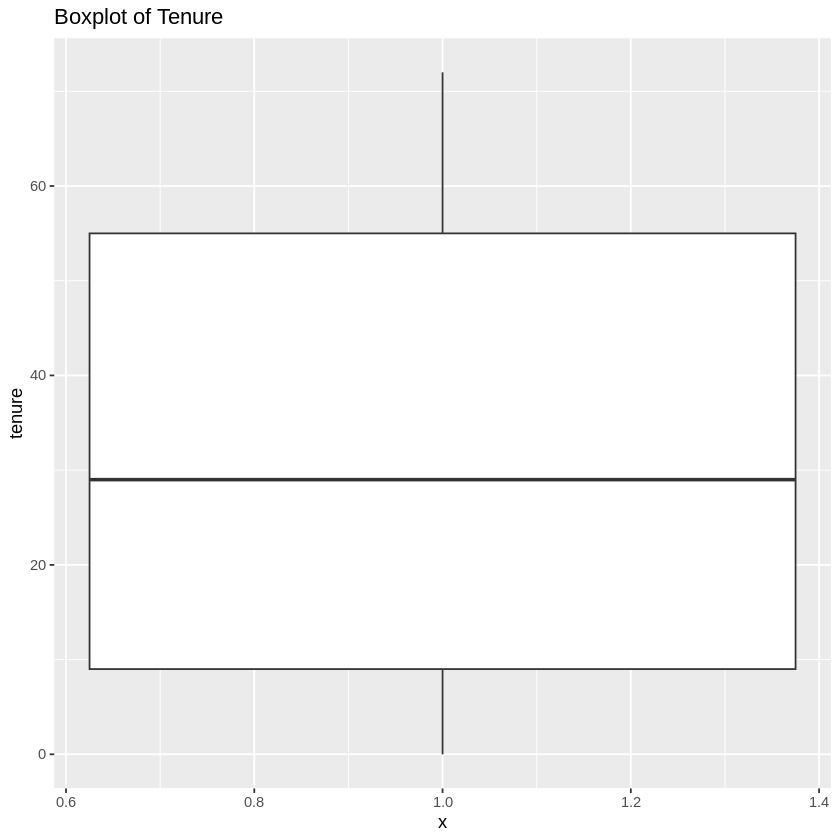

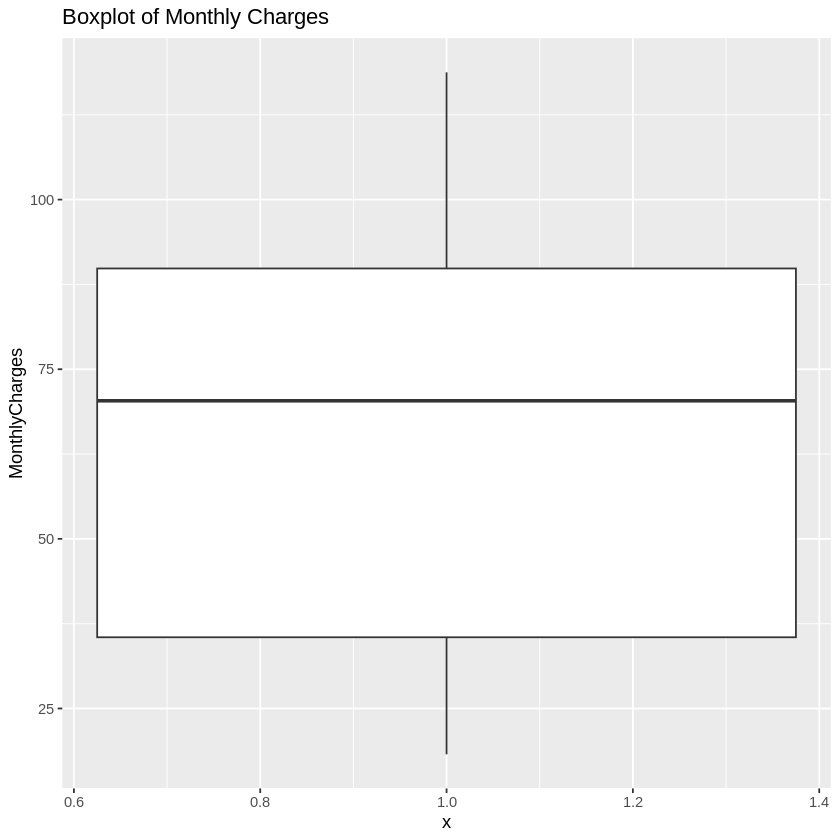

In [ ]:
# Create a boxplot for tenure and MonthlyCharges
ggplot(data, aes(x = 1, y = tenure)) +
  geom_boxplot() +
  labs(title = "Boxplot of Tenure")

ggplot(data, aes(x = 1, y = MonthlyCharges)) +
  geom_boxplot() +
  labs(title = "Boxplot of Monthly Charges")

**Exploratory Data Analysis**

In [ ]:
# Explore the distribution of Churn
table(data$Churn)


  No  Yes 
5174 1869 

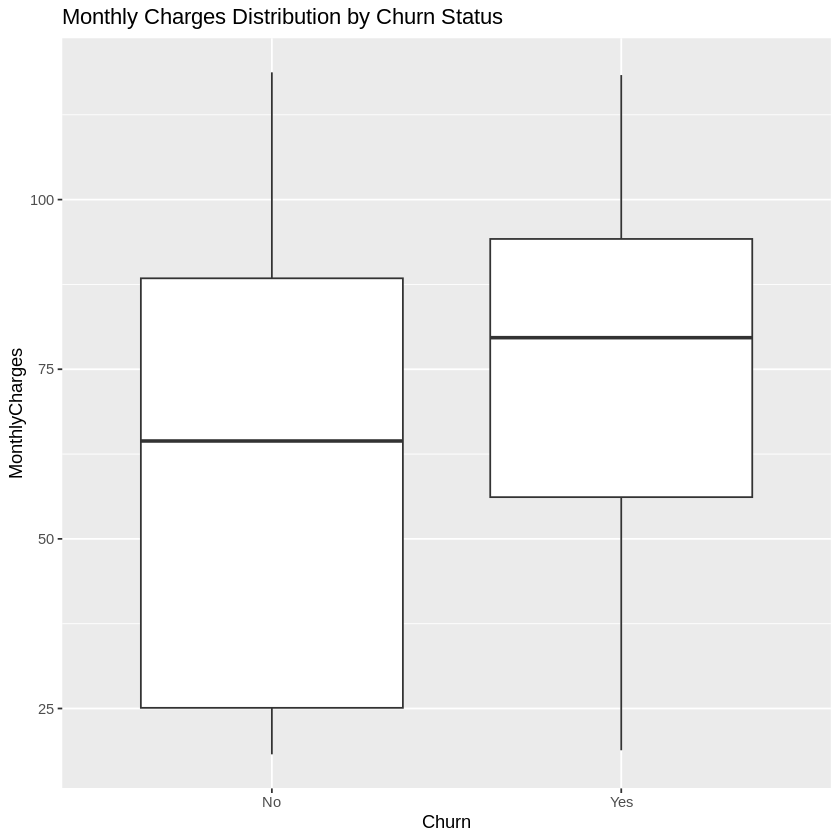

In [ ]:
# Visualize the distribution of key variables
library(ggplot2)
ggplot(data, aes(x = Churn, y = MonthlyCharges)) +
  geom_boxplot() +
  labs(title = "Monthly Charges Distribution by Churn Status")

In [ ]:
# Summary statistics for tenure based on Churn
summary(data$tenure)
by(data$tenure, data$Churn, summary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    9.00   29.00   32.37   55.00   72.00 

data$Churn: No
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   15.00   38.00   37.57   61.00   72.00 
------------------------------------------------------------ 
data$Churn: Yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00   10.00   17.98   29.00   72.00 

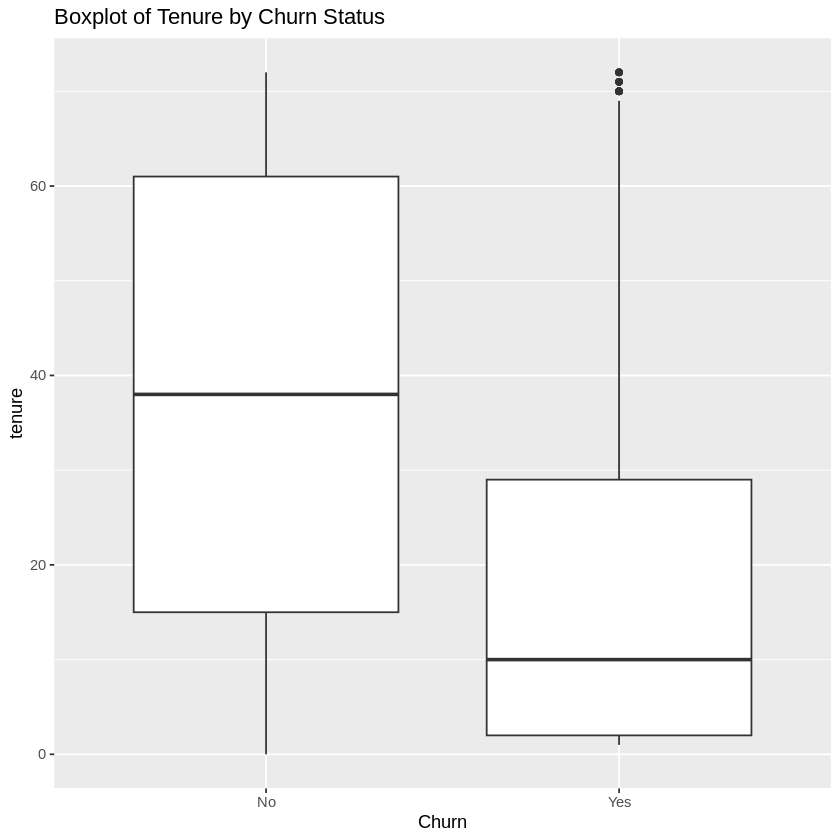

In [ ]:
# Boxplot for tenure based on Churn
ggplot(data, aes(x = Churn, y = tenure)) +
  geom_boxplot() +
  labs(title = "Boxplot of Tenure by Churn Status")


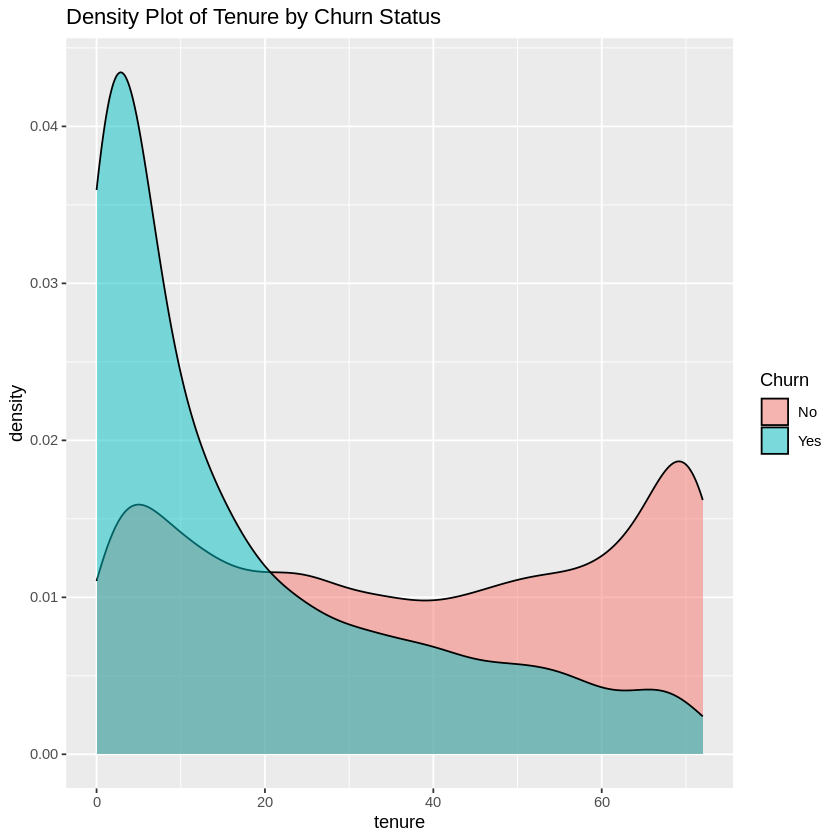

In [ ]:
# Density plot for tenure based on Churn
ggplot(data, aes(x = tenure, fill = Churn)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Tenure by Churn Status")


In [ ]:
# Proportion of Churn
prop.table(table(data$Churn))



       No       Yes 
0.7346301 0.2653699 

**Interpretation:**
* Customers who did not churn generally have higher median and mean tenures compared to those who churned.
* The median tenure for customers who did not churn is 38 months, suggesting a longer average customer relationship compared to those who churned (median of 10 months).
* The minimum tenure for customers who churned is 1 month, indicating that some customers may have churned shortly after joining.

In [6]:
# Convert Partner and Dependents to numeric
data$Partner <- as.numeric(data$Partner == "Yes")
data$Dependents <- as.numeric(data$Dependents == "Yes")

In [7]:
summary(data)

  customerID           gender          SeniorCitizen       Partner     
 Length:7043        Length:7043        Min.   :0.0000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.000  
                                       Mean   :0.1621   Mean   :0.483  
                                       3rd Qu.:0.0000   3rd Qu.:1.000  
                                       Max.   :1.0000   Max.   :1.000  
   Dependents         tenure      PhoneService       MultipleLines     
 Min.   :0.0000   Min.   : 0.00   Length:7043        Length:7043       
 1st Qu.:0.0000   1st Qu.: 9.00   Class :character   Class :character  
 Median :0.0000   Median :29.00   Mode  :character   Mode  :character  
 Mean   :0.2996   Mean   :32.37                                        
 3rd Qu.:1.0000   3rd Qu.:55.00                                        
 Max.   :1.0000   Max.   :72.00                                 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



               SeniorCitizen    Partner  Dependents     tenure MonthlyCharges
SeniorCitizen     1.00000000 0.01647866 -0.21118509 0.01656688     0.22017334
Partner           0.01647866 1.00000000  0.45267628 0.37969746     0.09684794
Dependents       -0.21118509 0.45267628  1.00000000 0.15971233    -0.11389023
tenure            0.01656688 0.37969746  0.15971233 1.00000000     0.24789986
MonthlyCharges    0.22017334 0.09684794 -0.11389023 0.24789986     1.00000000
TotalCharges      0.10300618 0.31750402  0.06207819 0.82617840     0.65117383
               TotalCharges
SeniorCitizen    0.10300618
Partner          0.31750402
Dependents       0.06207819
tenure           0.82617840
MonthlyCharges   0.65117383
TotalCharges     1.00000000


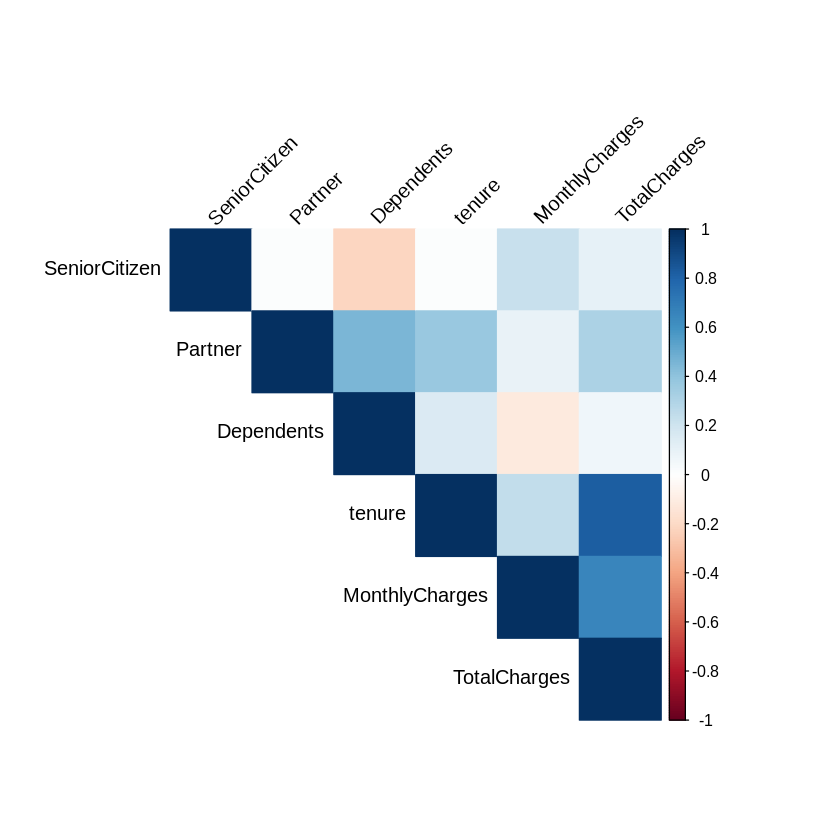

In [27]:
# Calculate the correlation matrix
cor_matrix <- cor(data[, sapply(data, is.numeric)], use = "complete.obs")

# Visualize the correlation matrix using a heatmap
install.packages("corrplot")
library(corrplot)

corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45)

print(cor_matrix)

**Building Predictive Models** Regression Model

In [14]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [10]:
# Convert InternetService and Contract to factors
data$InternetService <- factor(data$InternetService, levels = c("DSL", "Fiber optic", "No"))
data$Contract <- factor(data$Contract, levels = c("Month-to-month", "One year", "Two year"))


In [26]:
# Convert Churn column back to factor with levels "0" and "1"
data$Churn <- as.factor(ifelse(data$Churn == "Yes", "1", "0"))

# Check unique levels
unique(data$Churn)

[1] 0
Levels: 0

In [ ]:
summary(data)

  customerID           gender          SeniorCitizen       Partner     
 Length:7043        Length:7043        Min.   :0.0000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.000  
                                       Mean   :0.1621   Mean   :0.483  
                                       3rd Qu.:0.0000   3rd Qu.:1.000  
                                       Max.   :1.0000   Max.   :1.000  
   Dependents         tenure      PhoneService       MultipleLines     
 Min.   :0.0000   Min.   : 0.00   Length:7043        Length:7043       
 1st Qu.:0.0000   1st Qu.: 9.00   Class :character   Class :character  
 Median :0.0000   Median :29.00   Mode  :character   Mode  :character  
 Mean   :0.2996   Mean   :32.37                                        
 3rd Qu.:1.0000   3rd Qu.:55.00                                        
 Max.   :1.0000   Max.   :72.00                                 

In [15]:
library(caret)

# Split the dataset into training and testing sets
set.seed(123)
split_index <- createDataPartition(data$Churn, p = 0.7, list = FALSE)
train_data <- data[split_index, ]
test_data <- data[-split_index, ]

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [16]:
# Build a logistic regression model
model <- glm(Churn ~ tenure + MonthlyCharges + TotalCharges + InternetService + Contract,
             data = train_data, family = "binomial")

**Check Model Summary:**

In [17]:
summary(model)



Call:
glm(formula = Churn ~ tenure + MonthlyCharges + TotalCharges + 
    InternetService + Contract, family = "binomial", data = train_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -3.279e-02  2.337e-01  -0.140    0.888    
tenure                     -6.329e-02  7.617e-03  -8.309  < 2e-16 ***
MonthlyCharges             -1.967e-03  4.128e-03  -0.477    0.634    
TotalCharges                3.881e-04  8.649e-05   4.487 7.22e-06 ***
InternetServiceFiber optic  1.002e+00  1.531e-01   6.546 5.91e-11 ***
InternetServiceNo          -9.966e-01  1.865e-01  -5.345 9.04e-08 ***
ContractOne year           -9.953e-01  1.280e-01  -7.777 7.40e-15 ***
ContractTwo year           -1.893e+00  2.042e-01  -9.269  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5707.1  on 4930  degrees of freedom
Residual deviance: 4214.2  on 4


**Interpretation**
* **Intercept: **This is the log-odds of the response when all other predictors are zero.
* **tenure, MonthlyCharges, TotalCharges: **These coefficients represent the change in the log-odds for a one-unit increase in each respective variable.
* **InternetServiceFiber optic, InternetServiceNo, ContractOne year, ContractTwo year:** These coefficients represent the change in the log-odds compared to the reference level (DSL for InternetService and Month-to-month for Contract).

** Model Diagnostics:**

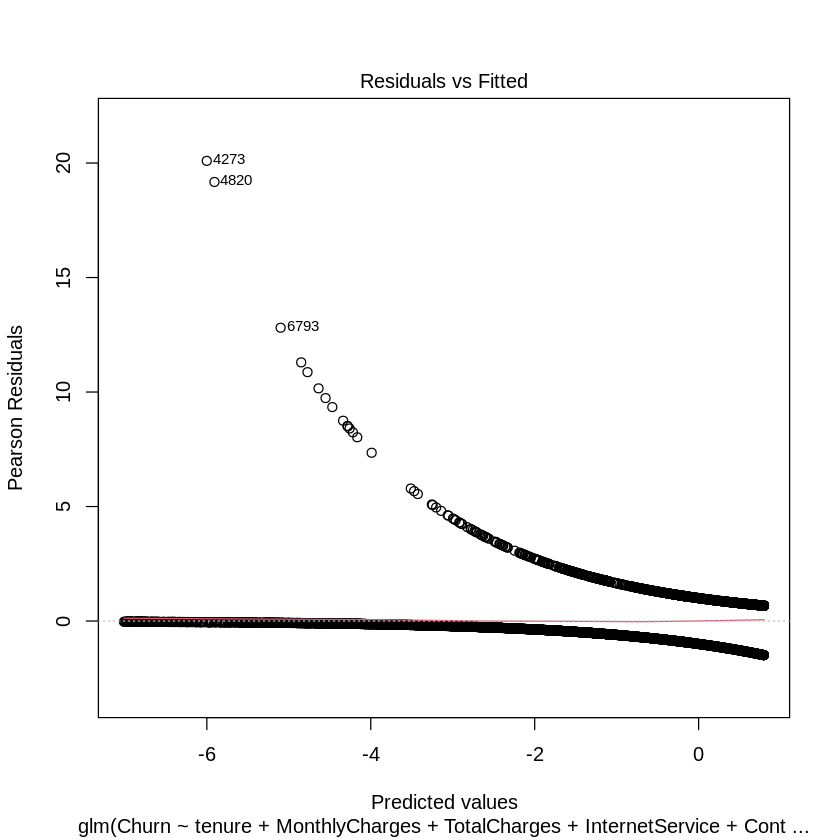

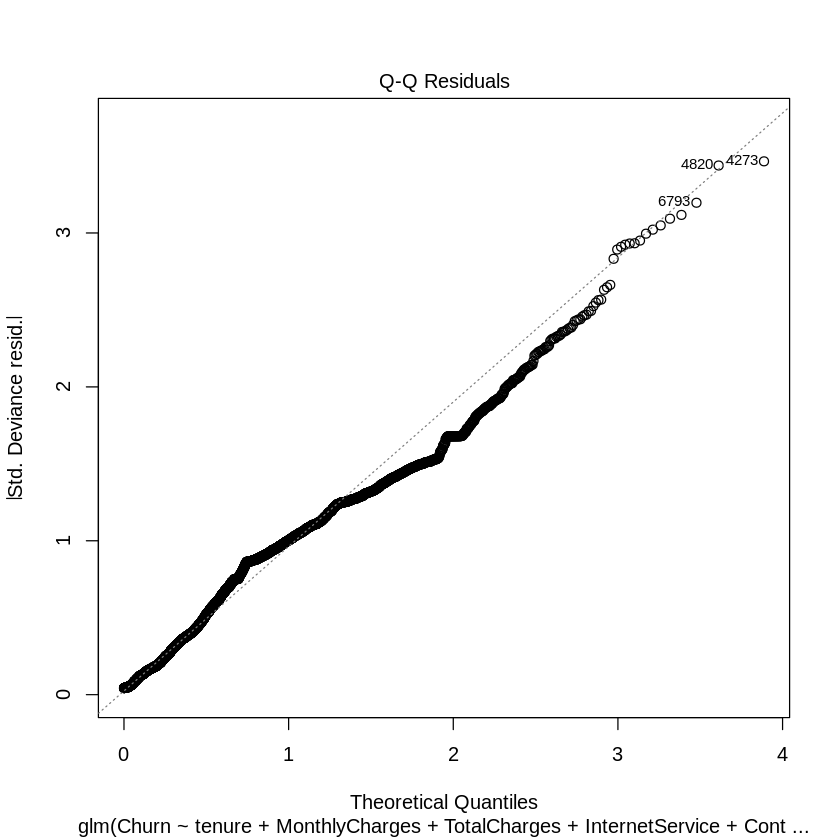

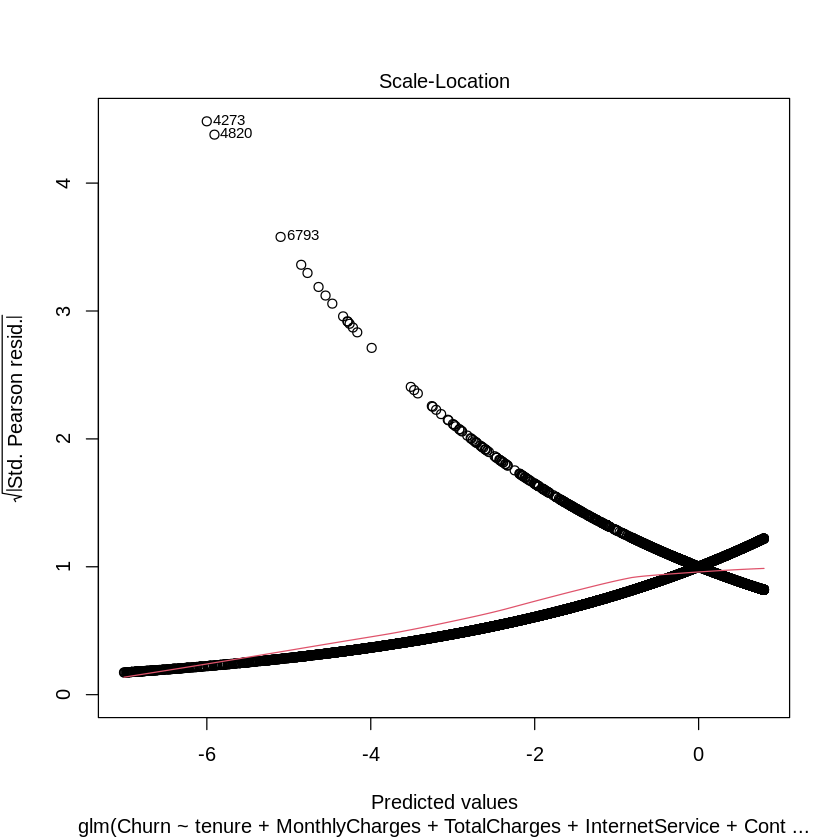

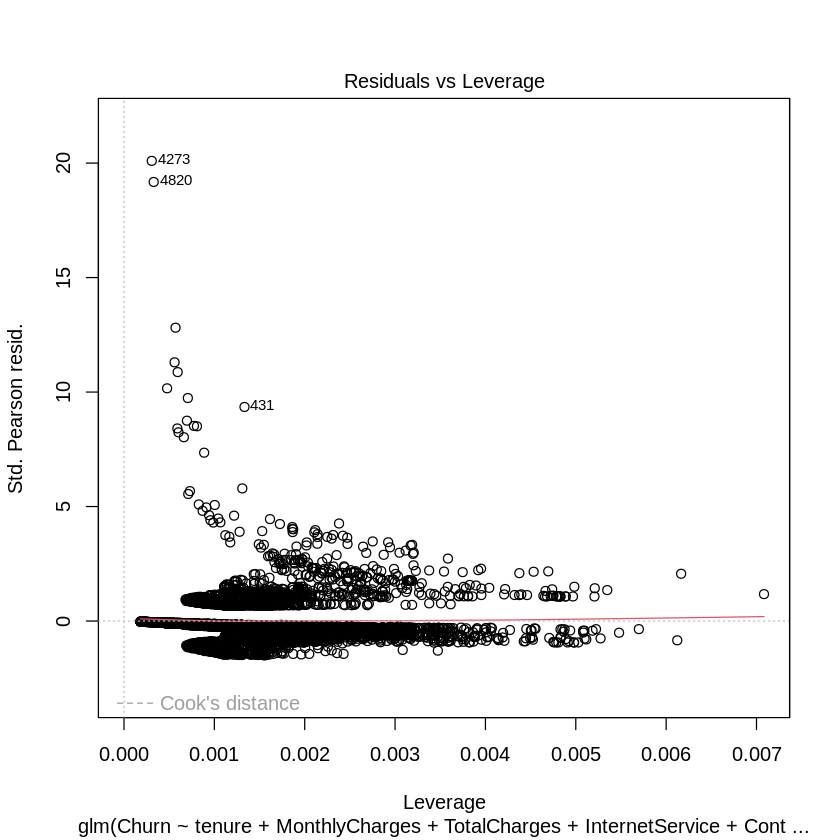

In [18]:
plot(model)


**Confusion Matrix and Accuracy:**

In [19]:

predicted_probs <- predict(model, newdata = test_data, type = "response")
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)

# Create a confusion matrix
conf_matrix <- table(Actual = as.numeric(test_data$Churn), Predicted = predicted_classes)
conf_matrix
# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy


      Predicted
Actual    0    1
     1 1402  150
     2  282  278

[1] 0.7954545

**Interpretation:**

* The model correctly predicted 79.55% of cases in the test data.
* It correctly identified 1402 customers who stayed (true negatives) and 278 customers who left (true positives).
* There were 150 instances where the model predicted a customer would leave but they didn't (false positives), and 282 instances where the model predicted a customer would stay but they left (false negatives).

** ROC Curve and AUC:**

In [ ]:
unique(test_data$Churn)


[1] 0 1
Levels: 0 1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.833

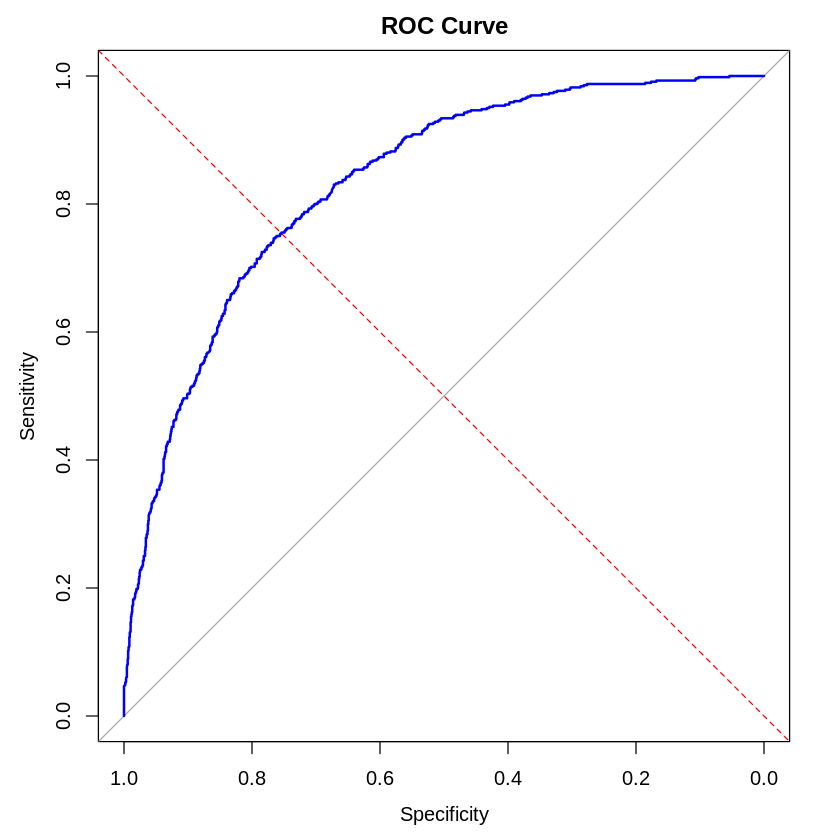

In [ ]:
library(pROC)

roc_curve <- roc(test_data$Churn, predicted_probs)
auc_value <- auc(roc_curve)

plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)
abline(a = 0, b = 1, lty = 2, col = "red")
auc_value


**Interpretation:**

* The AUC value of 0.833 indicates a relatively good performance of your model. A higher AUC value suggests that the model is better at distinguishing between the positive and negative classes.
* The ROC curve visually represents the trade-off between the true positive rate (sensitivity) and the false positive rate across different probability thresholds.
ROC Curve:

In [20]:
# Calculate precision, recall, and F1 score
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])
recall <- conf_matrix[2, 2] / sum(conf_matrix[2, ])
f1_score <- 2 * (precision * recall) / (precision + recall)

precision
recall
f1_score


[1] 0.6495327

[1] 0.4964286

[1] 0.562753

**Interpretation:**

* Precision: About 64.95% of the customers predicted to churn by the model actually did churn.
* Recall (Sensitivity): The model correctly identified approximately 49.64% of the actual customers who churned.
* F1 Score: The harmonic mean of precision and recall is approximately 56.28%. This metric provides a balance between precision and recall, considering both false positives and false negatives.

**Random Forest:**

In [21]:
install.packages("randomForest")

library(randomForest)
model_rf <- randomForest(Churn ~ tenure + MonthlyCharges + TotalCharges + InternetService + Contract, data = train_data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
# Print the summary of the model
print(model_rf)


Call:
 randomForest(formula = Churn ~ tenure + MonthlyCharges + TotalCharges +      InternetService + Contract, data = train_data) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 21.54%
Confusion matrix:
     0   1 class.error
0 3225 397   0.1096080
1  665 644   0.5080214


In [23]:
# Make predictions on the test set
predictions_rf <- predict(model_rf, newdata = test_data)

In [24]:
# Evaluate the model's performance
conf_matrix_rf <- table(Actual = as.numeric(test_data$Churn), Predicted = as.numeric(predictions_rf))
accuracy_rf <- sum(diag(conf_matrix_rf)) / sum(conf_matrix_rf)
print(conf_matrix_rf)
cat("Accuracy:", accuracy_rf, "\n")

      Predicted
Actual    1    2
     1 1387  165
     2  296  264
Accuracy: 0.7817235 


**Conclusion:**

**Churn Characteristics:**

* Tenure appears to be a significant factor; longer tenures are associated with lower churn rates.
* Monthly charges and total charges may also play a role, as suggested by their positive correlations with churn.
* InternetService (specifically Fiber optic) and Contract types (especially Month-to-month) are associated with higher odds of churn.

**Recommendations:**
* Consider targeting marketing strategies towards customers with shorter tenures.
* Investigate the reasons behind high churn associated with Fiber optic internet service and Month-to-month contracts.
* Explore ways to incentivize long-term contracts or upsell services to customers with higher monthly charges.
* Continue monitoring customer tenure and satisfaction to proactively address potential churn.

**Financial Considerations:**
* Spending on customer acquisition should be targeted towards customers with characteristics associated with lower churn rates.
* Analyze the cost-effectiveness of marketing strategies for different customer segments.
Consider allocating resources to retain and satisfy customers with higher tenure.

**Further Analysis:**
* Continuous monitoring and analysis of customer behavior and preferences.
* Regular updates and improvements to predictive models to enhance accuracy and relevance.
* Feedback loops with customer support and service teams for real-time insights.